In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats

In [2]:
data = pd.read_csv('Sold_And_Stats_Edited_New_a.csv')
data.head()

,Listing Number,Street Number,Street Number Modifier,Street Direction,Street Name,Street Suffix,Street Post Direction,City,State,Zip Code,...,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type,Selling Date
0,825199,1118,NaN,NaN,Alki,Ave,SW,Seattle,WA,98116,...,0.0,3,4080.0,1900000.0,1500000.0,78.947368,1000,10 - 1 Story,House,5/1/2017 0:00
1,902993,12805,NaN,NaN,78th,Ave,S,Seattle,WA,98178,...,0.0,0,10500.0,159000.0,155000.0,97.484277,580,10 - 1 Story,House,3/21/2018 0:00
2,1072254,810,NaN,NaN,34th,Ave,NaN,Seattle,WA,98122,...,0.0,0,4600.0,650000.0,650000.0,100.000000,1060,10 - 1 Story,House,5/5/2017 0:00
3,1106354,8735,NaN,NaN,1st,Ave,NW,Seattle,WA,98117,...,0.0,0,6350.0,410000.0,448000.0,109.268293,870,10 - 1 Story,House,5/16/2017 0:00
4,1110111,10403,NaN,NaN,15th,Ave,NaN,Seattle,WA,98125,...,0.0,0,6120.0,498000.0,475000.0,95.381526,1550,10 - 1 Story,House,5/15/2017 0:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57654 entries, 0 to 57653
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Listing Number                 57654 non-null  int64  
 1   Street Number                  57654 non-null  int64  
 2   Street Number Modifier         2257 non-null   object 
 3   Street Direction               17249 non-null  object 
 4   Street Name                    57654 non-null  object 
 5   Street Suffix                  55733 non-null  object 
 6   Street Post Direction          34223 non-null  object 
 7   City                           57654 non-null  object 
 8   State                          57654 non-null  object 
 9   Zip Code                       57654 non-null  int64  
 10  Area                           57654 non-null  object 
 11  Bathrooms                      57654 non-null  float64
 12  Bedrooms                       57654 non-null 

In [4]:
#Drop un-needed columns

data.drop(['Listing Number', 'Street Number', 'Street Number Modifier', 'Street Direction', 'Street Name', 'Street Suffix', 'Street Post Direction', 'City', 'State', 'Area', 'Selling Date','Style Code'], axis=1,inplace=True)

In [5]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
0,98116,0.0,3,4080.0,1900000.0,1500000.0,78.947368,1000,House
1,98178,0.0,0,10500.0,159000.0,155000.0,97.484277,580,House
2,98122,0.0,0,4600.0,650000.0,650000.0,100.000000,1060,House
3,98117,0.0,0,6350.0,410000.0,448000.0,109.268293,870,House
4,98125,0.0,0,6120.0,498000.0,475000.0,95.381526,1550,House


In [6]:
data.dtypes

Zip Code                           int64
Bathrooms                        float64
Bedrooms                           int64
Lot Square Footage               float64
Listing Price                    float64
Selling Price                    float64
Sold to List Price Percentage    float64
Square Footage                     int64
Property Type                     object
dtype: object

In [7]:
#Data cleaning

data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
data.dropna(subset=["Bathrooms", "Bedrooms"], how="all", inplace=True)

In [9]:
data.dropna(how='any', inplace=True)

In [10]:
data = data.fillna(0)

In [37]:
data[["Bathrooms", "Bedrooms", "Selling Price", "Listing Price"]] = data[["Bedrooms", "Bathrooms", "Selling Price", "Listing Price"]].apply(pd.to_numeric)

In [39]:
data = data.astype({"Bathrooms": int, "Bedrooms": int, "Selling Price": int, "Listing Price": int})

In [40]:
PropertyType = {'House': 1,
                'Condo': 2,
                'Townhouse': 3,
               }

In [41]:
data.replace({"Property Type": PropertyType}, regex=True, inplace=True)

In [42]:
data = data.astype({"Property Type": int})

In [43]:
data = data.astype({"Zip Code": str})

In [44]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
132,33,1,2,6120.0,349950,415000,118.588370,890,1
133,13,1,1,12269.0,1800000,1800000,100.000000,644,1
134,38,1,2,4383.0,525000,525000,100.000000,720,1
135,48,1,1,3333.0,449000,429500,95.657016,550,1
136,28,1,3,7920.0,299950,299950,100.000000,1320,1


In [45]:
data.dtypes

Zip Code                          object
Bathrooms                          int32
Bedrooms                           int32
Lot Square Footage               float64
Listing Price                      int32
Selling Price                      int32
Sold to List Price Percentage    float64
Square Footage                     int64
Property Type                      int32
dtype: object

In [46]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
132,33,1,2,6120.0,349950,415000,118.588370,890,1
133,13,1,1,12269.0,1800000,1800000,100.000000,644,1
134,38,1,2,4383.0,525000,525000,100.000000,720,1
135,48,1,1,3333.0,449000,429500,95.657016,550,1
136,28,1,3,7920.0,299950,299950,100.000000,1320,1


In [47]:
#DATA CLEANING

#data['Listing Price'] = data['Listing Price'].round(decimals=2)

In [48]:
#Houses where bedroom is 0

data.loc[(data['Bedrooms'] == 0)].head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type


In [49]:
#Houses with 0 bathrooms

data.loc[(data['Bathrooms'] == 0)].head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type


In [50]:
#Check the outliers (most expensive)

data.sort_values(by=['Selling Price'],ascending=False).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
32936,31,6,4,50705.0,35000000,30750000,87.857143,9791,1
23147,16,3,4,67106.0,15000000,14850000,99.000000,4620,1
13113,22,4,4,32856.0,16750000,14275000,85.223881,5612,1
31817,22,3,4,64981.0,15000000,13750000,91.666667,6750,1
13157,22,6,6,9750.0,13895000,13300000,95.717884,8703,1


In [51]:
#Check the outliers (cheapest)

data.loc[(data['Selling Price'] > 0)].sort_values(by=['Selling Price']).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
34810,46,1,1,0.0,67500,73000,108.148148,680,2
33889,49,1,1,0.0,99950,96000,96.048024,683,2
33913,51,1,1,292737.0,100000,100000,100.000000,602,2
44523,41,1,1,37800.0,99950,100600,100.650325,492,2
42959,46,2,2,0.0,117000,105000,89.743590,999,2


In [52]:
#Check the outliers (widest sqft_living)

data.sort_values(by=['Square Footage'],ascending=False).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
13161,22,6,7,16874.0,7125000,6400000,89.824561,12280,1
13170,48,8,8,194167.0,4800000,3600000,75.000000,11240,1
13164,13,6,5,31000.0,15000000,10960000,73.066667,11000,1
32943,22,6,5,10000.0,3995000,4850000,121.401752,10416,1
32932,22,6,6,22690.0,5300000,5000000,94.339623,9800,1


In [53]:
#Drop 0 values from rows

data = data[(data[['Bathrooms','Bedrooms','Square Footage']] != 0).all(axis=1)]

In [54]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
132,33,1,2,6120.0,349950,415000,118.588370,890,1
133,13,1,1,12269.0,1800000,1800000,100.000000,644,1
134,38,1,2,4383.0,525000,525000,100.000000,720,1
135,48,1,1,3333.0,449000,429500,95.657016,550,1
136,28,1,3,7920.0,299950,299950,100.000000,1320,1


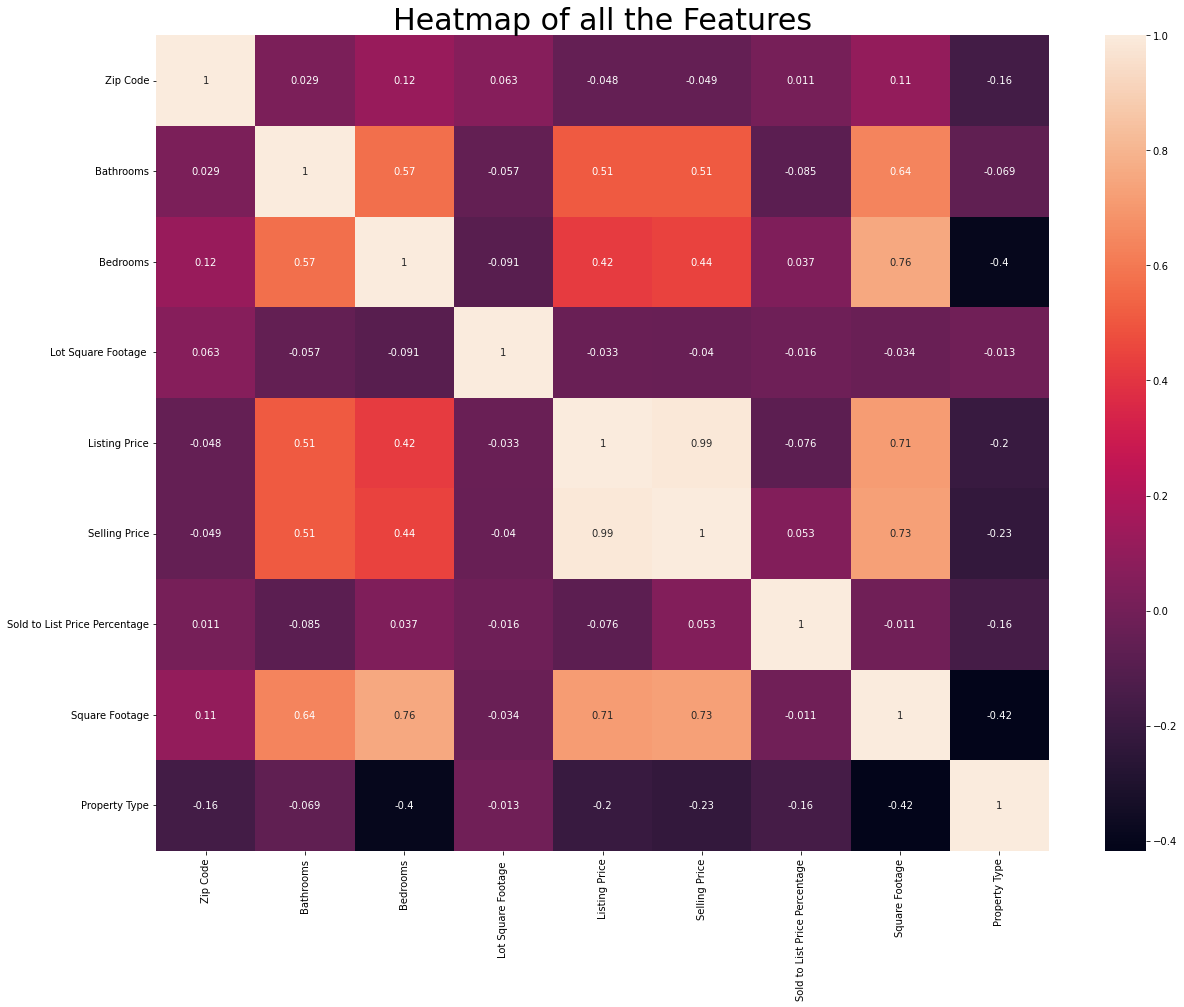

In [55]:
#Correlation Check

features = data
encoder = LabelEncoder()
features['Zip Code'] = encoder.fit_transform(features['Zip Code'])

plt.figure(figsize=(20,15))
sns.heatmap(features.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 30);
plt.show()


In [56]:
#Split data to X for variable input, and y for target class

y = features['Selling Price']
X = features.drop(['Selling Price'],axis=1)

In [57]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
##### LINEAR REGRESSION MODEL #####

reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))
print()
reg_pred = list(reg.predict(X_test))
for i in reg_pred[0:10]:
  print('Prediction price of house', reg_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))
mse = mean_squared_error(y_test,reg_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9930834347382493
coef of determination testing  0.9855065505288797

Prediction price of house 1 : $ 2152092.683676227
Prediction price of house 2 : $ 691630.876096429
Prediction price of house 3 : $ 744813.7169679146
Prediction price of house 4 : $ 851214.7452303775
Prediction price of house 5 : $ 741895.4978716561
Prediction price of house 6 : $ 3134747.7121009654
Prediction price of house 7 : $ 585698.0039107524
Prediction price of house 8 : $ 1517637.7311919024
Prediction price of house 9 : $ 663078.5524475063
Prediction price of house 10 : $ 960836.3218157735

Real price of house 1 : $ 2168000
Real price of house 2 : $ 650000
Real price of house 3 : $ 750000
Real price of house 4 : $ 850000
Real price of house 5 : $ 757000
Real price of house 6 : $ 3050000
Real price of house 7 : $ 585000
Real price of house 8 : $ 1525000
Real price of house 9 : $ 680000
Real price of house 10 : $ 965000

Mean Absolute Error:  18837.659034738263
Root Mean Square Er

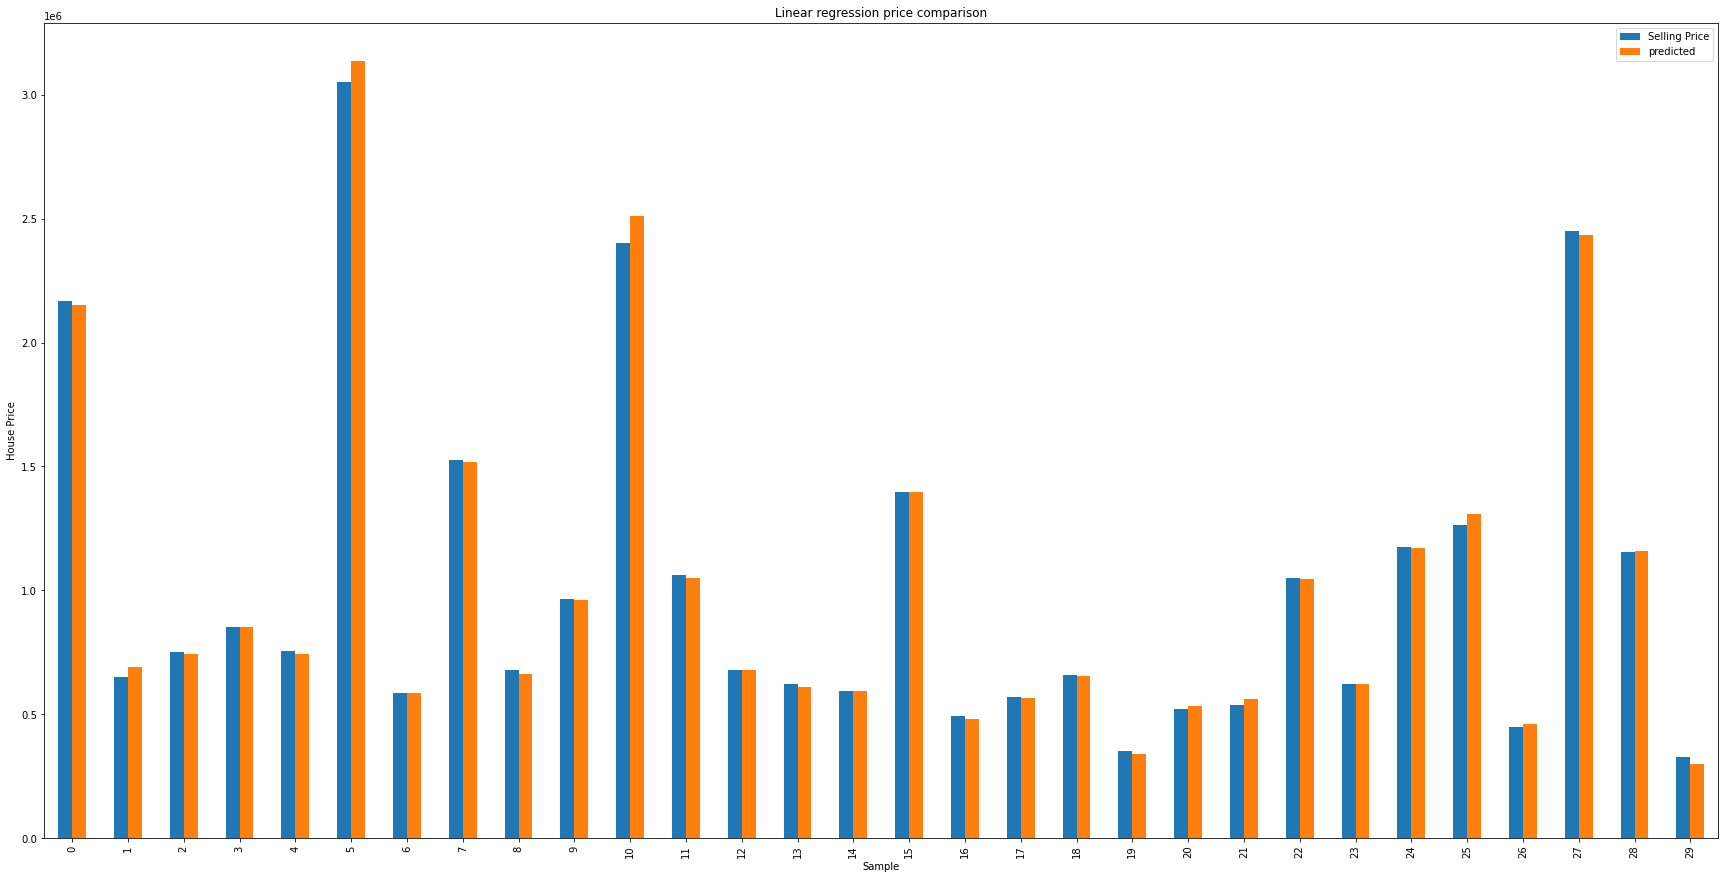

In [59]:
#VISUALIZE LINEAR REGRESSION MODEL

reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [60]:
##### DECISION TREE MODEL #####

dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = list(dt.predict(X_test))
for i in dt_pred[0:10]:
  print('Prediction price of house', dt_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))
mse = mean_squared_error(y_test,dt_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9999998912009684
coef of determination testing  0.9439008384118034

prediction
Prediction price of house 1 : $ 2185350.0
Prediction price of house 2 : $ 650000.0
Prediction price of house 3 : $ 750000.0
Prediction price of house 4 : $ 849972.7469879518
Prediction price of house 5 : $ 757000.0
Prediction price of house 6 : $ 3065000.0
Prediction price of house 7 : $ 584991.0256410256
Prediction price of house 8 : $ 1525000.0
Prediction price of house 9 : $ 680000.0
Prediction price of house 10 : $ 960000.0

Real price of house 1 : $ 2168000
Real price of house 2 : $ 650000
Real price of house 3 : $ 750000
Real price of house 4 : $ 850000
Real price of house 5 : $ 757000
Real price of house 6 : $ 3050000
Real price of house 7 : $ 585000
Real price of house 8 : $ 1525000
Real price of house 9 : $ 680000
Real price of house 10 : $ 965000

Mean Absolute Error:  32.89221085251537
Root Mean Square Error :  141386.95638876443


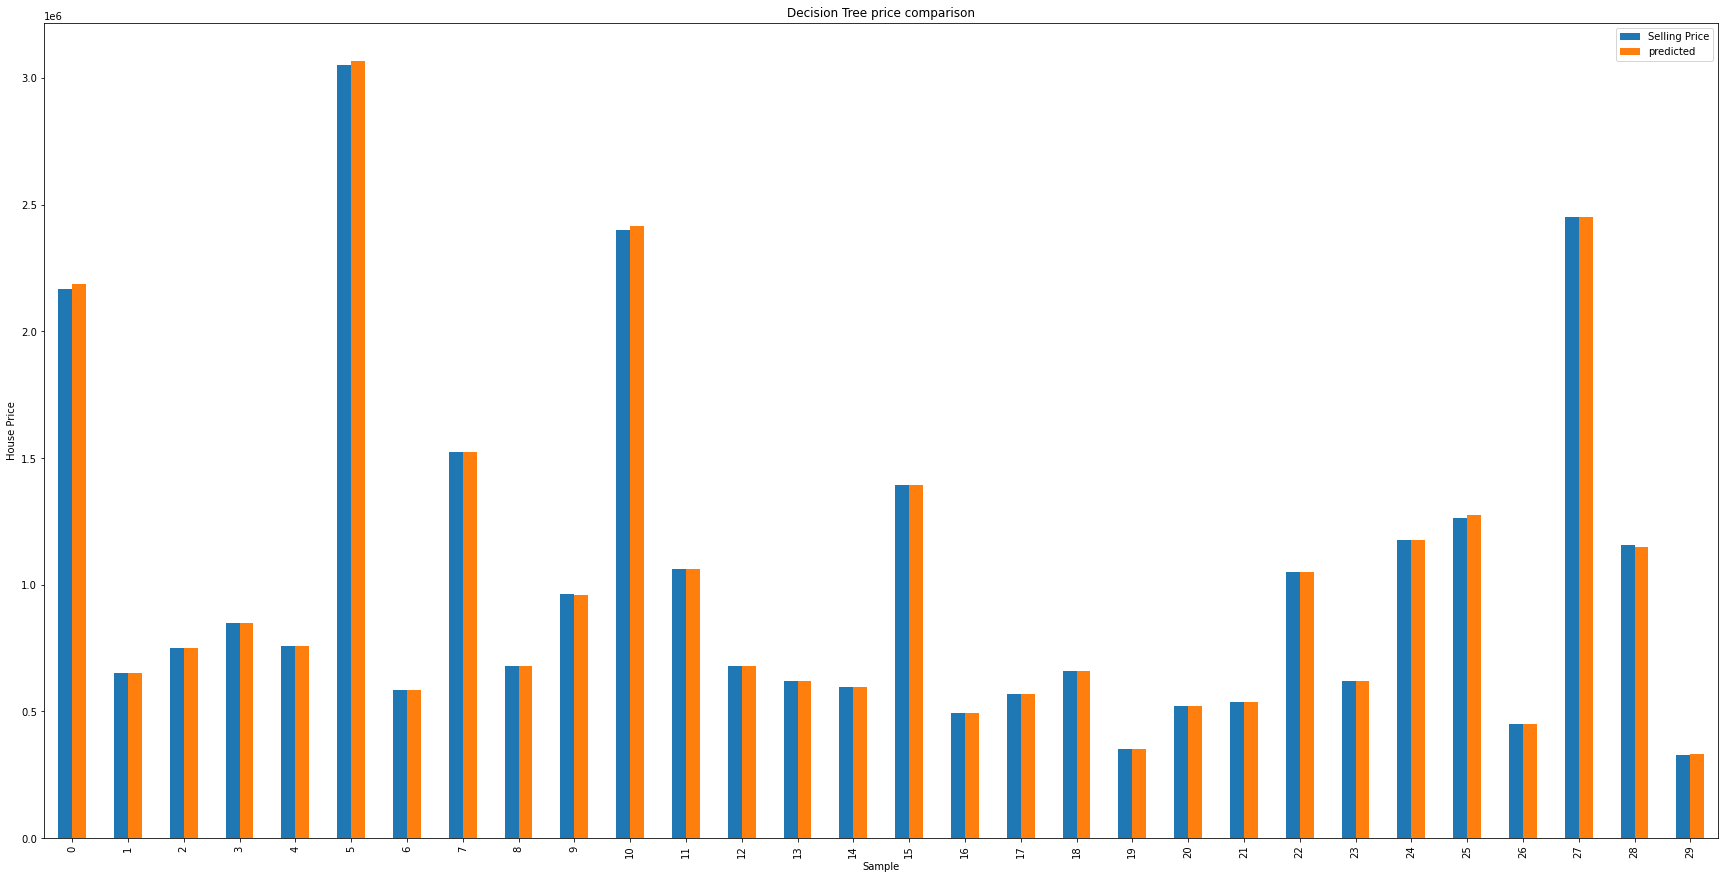

In [61]:
#VISUALIZE DECISION TREE

dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [62]:
##### RANDOM FOREST MODEL #####

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ',rf.score(X_train, y_train))
print('coef of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = list(rf.predict(X_test))
for i in rf_pred[0:10]:
  print('Prediction price of house', rf_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

mse = mean_squared_error(y_test,rf_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9995504190732444
coef of determination testing  0.9403902735052208

prediction
Prediction price of house 1 : $ 2175020.0
Prediction price of house 2 : $ 649920.0
Prediction price of house 3 : $ 750069.0
Prediction price of house 4 : $ 850000.0
Prediction price of house 5 : $ 756694.83
Prediction price of house 6 : $ 3053788.0
Prediction price of house 7 : $ 585000.0
Prediction price of house 8 : $ 1525390.0
Prediction price of house 9 : $ 680103.81
Prediction price of house 10 : $ 965375.0

Real price of house 1 : $ 2168000
Real price of house 2 : $ 650000
Real price of house 3 : $ 750000
Real price of house 4 : $ 850000
Real price of house 5 : $ 757000
Real price of house 6 : $ 3050000
Real price of house 7 : $ 585000
Real price of house 8 : $ 1525000
Real price of house 9 : $ 680000
Real price of house 10 : $ 965000

Mean Absolute Error:  981.4772707022041
Root Mean Square Error :  145743.6778728077


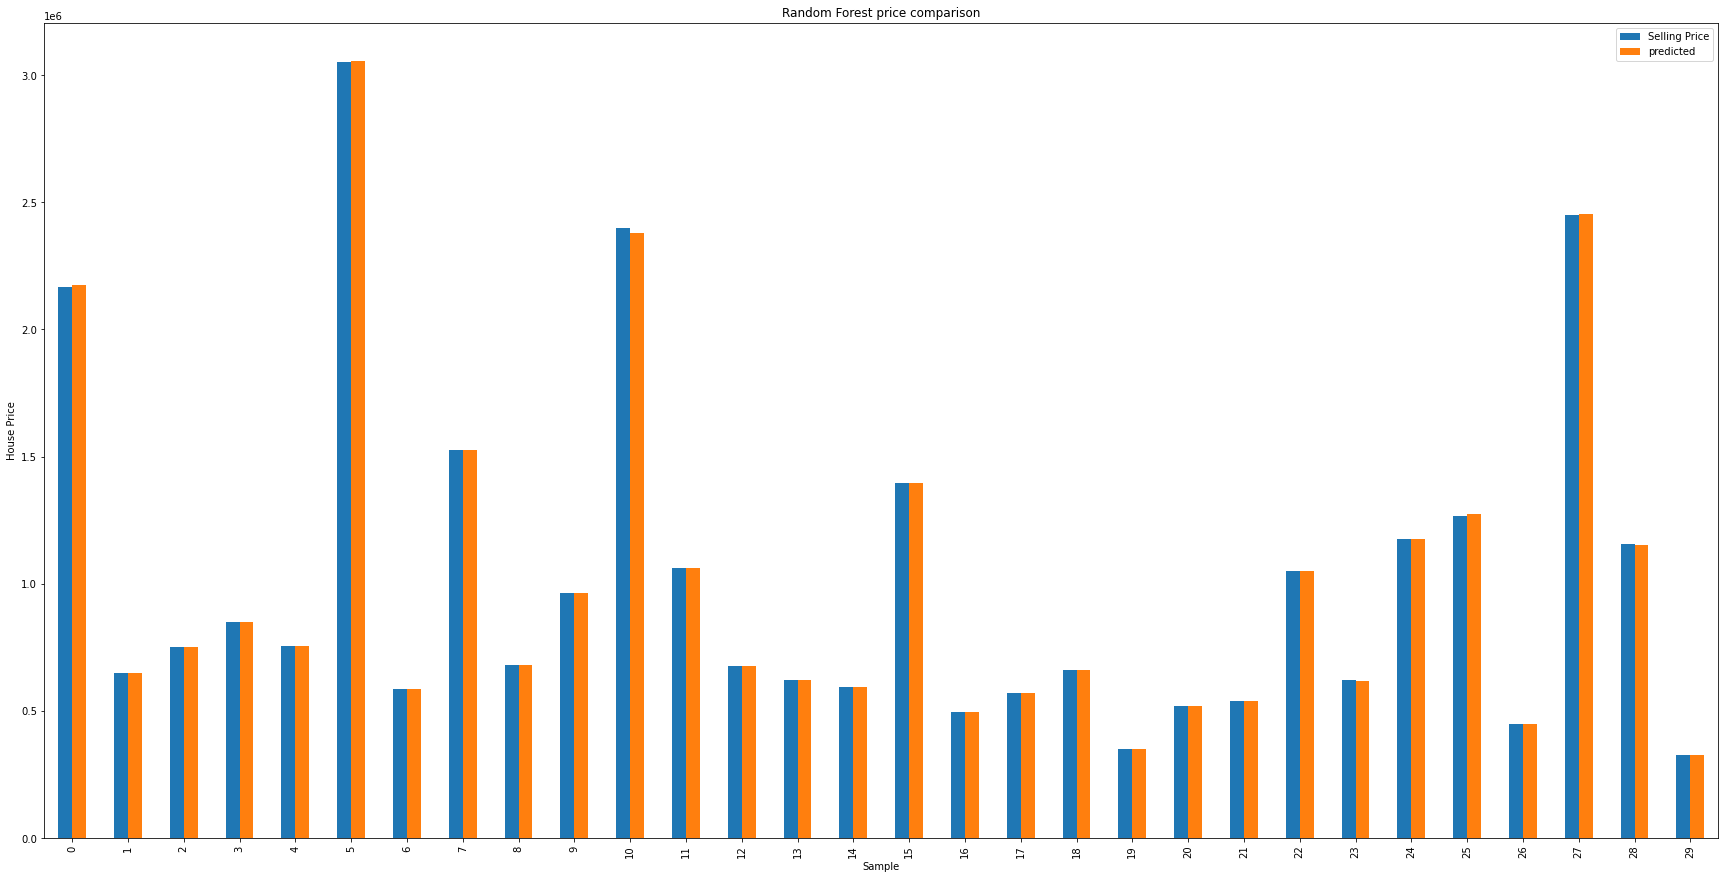

In [64]:
#VISUALIZE RANDOM FOREST MODEL

rf_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:30], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Random Forest price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()